# Calendar to take care my grandmother

In 2022, I created this calendar because my aunts and uncles were having trouble creating a calendar for taking care my grandmother that was reliable and unbiased. For example, on 2023 my aunt made an uncle take care of my grandmother for 5 consecutive days because he 'magically' dropped on a group of dates that were holy week, plus weekend, plus a holiday.

This calendar generator tries to address this issue.

As an input, you have to provide:
- The list of care givers and an RGB color to identify them.
- The list of holidays for a given year. You may also want to add right now the first of January next year.
- The start date and amount of days you want to generate.

This algorithm works the following way:
- It assumes there is a paid caregiver taking care of my grandmother during working weekdays.
- A caregiver from the list will be assigned at least 1 day but no more than 3 days in a row.
- If there are more than 4 days in a row, it will switch the caregiver to the next one and split the 4 days into 2 for each caregiver.
- The caregivers will be assigned from the `care_givers` variable in a circular order.
- It does not take into account the possible vacations the paid caregiver would take off.

## Caregivers

Below you can define the caregivers and assign them an RGB color. I have used my aunts and uncles as caregivers.

These caregivers will be assigned in a circular order - meaning that after the last one in the list gets assigned, the first one is going next.

💡 **Tip:** You can roll a dice to choose this order.

In [45]:
care_givers = [
    {
        "Name": "William",
        "Color": [255, 105, 97]
    },
    {
        "Name": "Guiselle",
        "Color": [255, 180, 128]
    },
    {
        "Name": "Javier",
        "Color": [248, 243, 141]
    },
    {
        "Name": "Jeanneth",
        "Color": [66, 214, 164]
    },
    {
        "Name": "Carmen",
        "Color": [8, 202, 209]
    },
    {
        "Name": "Maribel",
        "Color": [89, 173, 246]
    },
    {
        "Name": "Roberto",
        "Color": [157, 148, 255]
    },
    {
        "Name": "Carlos",
        "Color": [199, 128, 232]
    }
]

## Holidays

In Costa Rica there are holidays that are paid by law. This means that the paid caregiver can either take the holiday off or get paid twice for that day. We will assume that the paid caregiver is going to take the holiday off.

The cell below declares which dates are holidays in this format: Year, Month, Day.

Based on:
- https://www.tec.ac.cr/vacaciones-dias-asueto-2016
- https://www.elfinancierocr.com/economia-y-politica/casi-todos-los-feriados-del-2023-seran-entre/FFDBHJEGGRERJPIMATRFX6KCE4/story/
- https://www.mtss.go.cr/temas-laborales/feriados/feriados_calendario_2024.pdf

In [46]:
import datetime as dt

oldholidays = [
    # Older holidays - for record purposes
    dt.datetime(2022, 1, 1),  # New year
    dt.datetime(2022, 4, 11), # April 11, Rivas battle
    dt.datetime(2022, 4, 14), # Holy week
    dt.datetime(2022, 4, 15), # Holy week
    dt.datetime(2022, 5, 1),  # Labor day
    dt.datetime(2022, 7, 25), # Nicoya
    dt.datetime(2022, 8, 2),  # Angeles
    dt.datetime(2022, 8, 15), # Mothers day
    dt.datetime(2022, 9, 15), # Independence day
    dt.datetime(2022, 12, 5), # Army abolition
    dt.datetime(2022, 12, 25),# Christmas
    dt.datetime(2023, 1, 1),  # New year
    dt.datetime(2023, 4, 6),  # Holy week
    dt.datetime(2023, 4, 7),  # Holy week
    dt.datetime(2023, 4, 10), # April 11, Rivas battle
    dt.datetime(2023, 5, 1),  # Labor day
]

holidays = [
    dt.datetime(2024, 1, 1),  # New year
    dt.datetime(2024, 3, 28), # Holy week
    dt.datetime(2024, 3, 29), # Holy week
    dt.datetime(2024, 4, 15), # April 11, Rivas battle
    dt.datetime(2024, 5, 1),  # Labor day
    dt.datetime(2024, 7, 29), # Nicoya
    # dt.datetime(2024, 8, 2),  # Lady of the Angels Day
    dt.datetime(2024, 8, 19), # Mothers day
    # dt.datetime(2024, 8, 31), # Day of the Black Person and Afro-Costa Rican Culture
    dt.datetime(2024, 9, 15), # Independence day
    dt.datetime(2024, 12, 1), # Army abolition
    dt.datetime(2024, 12, 25),# Christmas
    dt.datetime(2025, 1, 1),  # New year 2025
]

for holiday in holidays:
    print(holiday.strftime("%A %d, %B %Y"))

Saturday 01, January 2022
Monday 11, April 2022
Thursday 14, April 2022
Friday 15, April 2022
Sunday 01, May 2022
Monday 25, July 2022
Tuesday 02, August 2022
Monday 15, August 2022
Thursday 15, September 2022
Monday 05, December 2022
Sunday 25, December 2022
Sunday 01, January 2023
Thursday 06, April 2023
Friday 07, April 2023
Monday 10, April 2023
Monday 01, May 2023
Monday 01, January 2024
Thursday 28, March 2024
Friday 29, March 2024
Monday 15, April 2024
Wednesday 01, May 2024
Monday 29, July 2024
Monday 19, August 2024
Sunday 15, September 2024
Sunday 01, December 2024
Wednesday 25, December 2024
Wednesday 01, January 2025


## Calendar range

Below we define the calendar start date and how many days we want to generate.

In [47]:
days = 371
start_date = dt.datetime(2024, 1, 1)
dates = [start_date + dt.timedelta(days=i) for i in range(days)]

The following function defines if a date is weekend or holiday.

In [48]:
def is_weekend_or_holiday(date):
    # Saturday
    if date.weekday() == 5:
        return True
    
    # Sunday
    if date.weekday() == 6:
        return True
    
    if date in holidays:
        return True
    
    return False

How many days to take care of grandma?

In [49]:
care_dates = list(filter(lambda date: is_weekend_or_holiday(date), dates))

len(care_dates)

115

The cell below is in charge of the logic for assigning care givers to the calendar. The logic works the following way:


In [50]:
from itertools import cycle
import json

calendar = []
care_giver_it = cycle(care_givers)
care_giver = next(care_giver_it)
continued_days = 0

for i in range(len(dates)):
    if dates[i] not in care_dates:
        calendar.append({
            "Date": dates[i].strftime("%d %B, %Y"),
            "Name": "Paid care giver",
            "Color": [255, 255, 255]
        })
        continue
    
    
    calendar.append({
        "Date": dates[i].strftime("%d %B, %Y"),
        "Name": care_giver["Name"],
        "Color": care_giver["Color"]
    })
    
    continued_days += 1
    
    next_day = dates[i] + dt.timedelta(days=1)
    next_two_days = dates[i] + dt.timedelta(days=2)
    
    # Tomorrow not holiday
    if not is_weekend_or_holiday(next_day):
        care_giver = next(care_giver_it)
        continued_days = 0
        continue
    
    # Current care giver with already 3 days
    if continued_days >= 3:
        care_giver = next(care_giver_it)
        continued_days = 0
        continue
    
    # Current care giver with 2 days and next 2 days are weekend or holidays
    if continued_days == 2 and is_weekend_or_holiday(next_day) and is_weekend_or_holiday(next_two_days):
        care_giver = next(care_giver_it)
        continued_days = 0
        continue

#print(json.dumps(calendar))

The cell below is in charge of plotting the calendar.

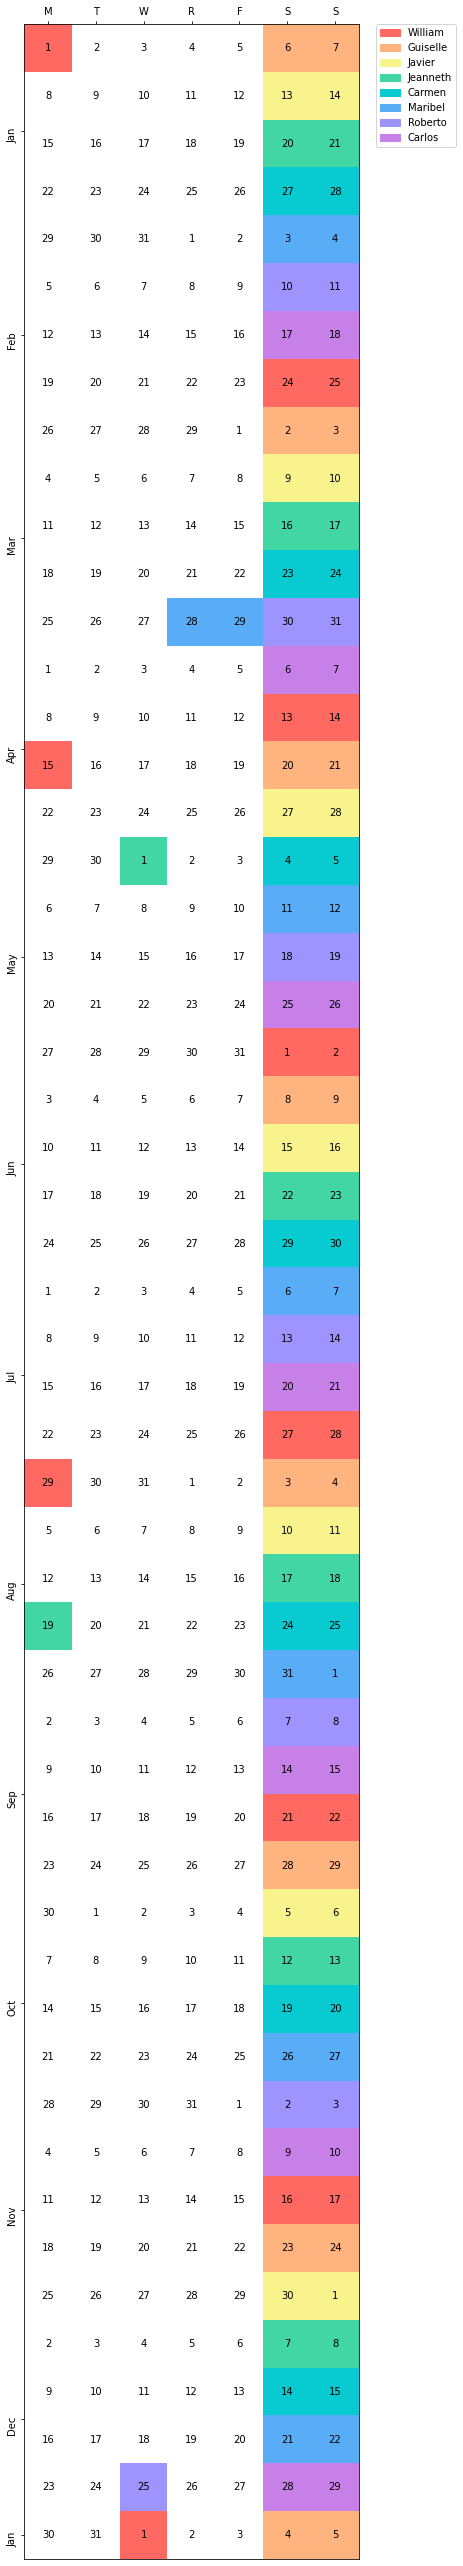

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

def prepare_data(calendar):
    colors = list(map(lambda x: x['Color'], calendar))
    return np.array(colors)

def calendar_array(dates, data):
    _, j = zip(*[d.isocalendar()[1:] for d in dates])
    
    i = []
    initial_year = dates[0].isocalendar()[0]
    for d in dates:
        multiplier = d.isocalendar()[0] - initial_year
        i.append(d.isocalendar()[1] + 52 * multiplier)
    
    i = np.array(i) - min(i)
    j = np.array(j) - 1
    ni = max(i) + 1

    calendar = np.array([255, 255, 255]) * np.ones((ni, 7, 3))
    calendar[i, j] = data
    return i, j, calendar

def calendar_heatmap(ax, dates, data):
    i, j, calendar = calendar_array(dates, data)
    im = ax.imshow(calendar.astype(np.uint8), interpolation='none')
    label_days(ax, dates, i, j, calendar)
    label_months(ax, dates, i, j, calendar)

def label_days(ax, dates, i, j, calendar):
    ni, nj, _ = calendar.shape
    day_of_month = np.nan * np.zeros((ni, 7))
    day_of_month[i, j] = [d.day for d in dates]

    for (i, j), day in np.ndenumerate(day_of_month):
        if np.isfinite(day):
            ax.text(j, i, int(day), ha='center', va='center')

    ax.set(xticks=np.arange(7), 
           xticklabels=['M', 'T', 'W', 'R', 'F', 'S', 'S'])
    ax.xaxis.tick_top()

def label_months(ax, dates, i, j, calendar):
    month_labels = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                             'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    initial_year = dates[0].year
    months = np.array([d.month + (12 * (d.year - initial_year)) for d in dates])
    uniq_months = sorted(set(months))
    yticks = [i[months == m].mean() for m in uniq_months]
    labels = [month_labels[m%12 - 1] for m in uniq_months]
    ax.set(yticks=yticks)
    ax.set_yticklabels(labels, rotation=90)

data = prepare_data(calendar)
fig, ax = plt.subplots(figsize=(6, 200))
calendar_heatmap(ax, dates, data)
patches = [ mpatches.Patch(color=list(map(lambda y: y/255, x['Color'])), label=x['Name']) for x in care_givers ]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()